# [Titanic Dataset](https://www.kaggle.com/competitions/titanic)
---
(Yay, I love analysing disastrous outcomes where thousands of people died 🥰)

In [1]:
# !kaggle competitions download -c titanic
# !unzip titanic.zip
# !rm -rf titanic.zip

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train = pd.read_csv("train.csv", index_col="PassengerId")
print(df_train.shape)
df_train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test = pd.read_csv("test.csv", index_col="PassengerId")
print(df_test.shape)
df_test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df = pd.concat([df_train, df_test], axis=0)
df.iloc[886:897]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


## Data Preprocessing
---

### Null Cleaning

In [6]:
df_modified = df.drop(columns=["Name", "Ticket"])
df_modified.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,NaN,S
2,1.0,1,female,38.0,1,0,71.2833,C85,C
3,1.0,3,female,26.0,0,0,7.9250,NaN,S
4,1.0,1,female,35.0,1,0,53.1000,C123,S
5,0.0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
df_modified.drop("Survived", axis=1).isna().sum()

Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [8]:
df_modified.drop("Survived", axis=1).isna().sum() * 100 / df_modified.shape[0]

Pclass       0.000000
Sex          0.000000
Age         20.091673
SibSp        0.000000
Parch        0.000000
Fare         0.076394
Cabin       77.463713
Embarked     0.152788
dtype: float64

Mkc Cabin m Majority toh null hi hai kaam kya iska?

In [9]:
df_modified.drop("Cabin", axis=1, inplace=True)
df_modified.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,S
2,1.0,1,female,38.0,1,0,71.2833,C
3,1.0,3,female,26.0,0,0,7.9250,S
4,1.0,1,female,35.0,1,0,53.1000,S
5,0.0,3,male,35.0,0,0,8.0500,S


`Embarked` and `Fare` have a really low percentage of null values... are these in train or test set?

In [10]:
df_modified[df_modified[["Fare", "Embarked"]].isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
62,1.0,1,female,38.0,0,0,80.0,NaN
830,1.0,1,female,62.0,0,0,80.0,NaN
1044,NaN,3,male,60.5,0,0,NaN,S


Let's only remove the **train set**!

In [11]:
df_modified[
    (df_modified[["Fare", "Embarked"]].isna().any(axis=1))
    & df_modified["Survived"].notna()
]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
62,1.0,1,female,38.0,0,0,80.0,NaN
830,1.0,1,female,62.0,0,0,80.0,NaN


In [12]:
df_modified.drop(
    df_modified[
        (df_modified[["Fare", "Embarked"]].isna().any(axis=1))
        & df_modified["Survived"].notna()
    ].index,
    axis=0,
    inplace=True,
)
df_modified.shape

(1307, 8)

In [13]:
df_modified[df_modified[["Fare", "Embarked"]].isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1044,NaN,3,male,60.5,0,0,NaN,S


Can fill in this test row's Fare with just a median. Might become weird, but it's just one row.

In [14]:
df_modified["Fare"] = df_modified["Fare"].fillna(df_modified["Fare"].median())
df_modified.drop("Survived", axis=1).isna().sum() * 100 / df_modified.shape[0]

Pclass       0.000000
Sex          0.000000
Age         20.122418
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.000000
dtype: float64

20% of ages are null, hmmmmmmm.... train set?

In [15]:
df.groupby(df["Survived"].isna().map({True: "Test Data", False: "Train Data"}))[
    "Age"
].apply(lambda col: col.isna().sum()).reset_index(name="Age Null Count")

,Survived,Age Null Count
0,Test Data,86
1,Train Data,177


I have 2 methods in mind:-
1. `fillna(df['Age'].mean())` for now
2. **BETTER METHOD:** Fit a regression model later (e.g., RandomForestRegressor) on known Age values using features, then predict Age for missing rows!

### Checking TRUE Duplicates

In [16]:
df.duplicated().any()

np.False_

In [17]:
df_modified.shape

(1307, 8)

### Handling Categorical Bullshit

In [18]:
df_modified.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,S
2,1.0,1,female,38.0,1,0,71.2833,C
3,1.0,3,female,26.0,0,0,7.9250,S
4,1.0,1,female,35.0,1,0,53.1000,S
5,0.0,3,male,35.0,0,0,8.0500,S


In [19]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 1 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    1307 non-null   int64  
 2   Sex       1307 non-null   object 
 3   Age       1044 non-null   float64
 4   SibSp     1307 non-null   int64  
 5   Parch     1307 non-null   int64  
 6   Fare      1307 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 91.9+ KB


In [20]:
df_modified["Sex"].value_counts(dropna=False)

Sex
male      843
female    464
Name: count, dtype: int64

In [21]:
pd.get_dummies(df_modified["Sex"], prefix="is", dtype=int)

,is_female,is_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
1305,0,1
1306,1,0
1307,0,1


In [22]:
df_modified = df_modified.join(
    pd.get_dummies(df_modified["Sex"], prefix="Is", dtype=int)
).drop("Sex", axis=1)

df_modified.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Is_female,Is_male
PassengerId,,,,,,,,,
1,0.0,3,22.0,1,0,7.2500,S,0,1
2,1.0,1,38.0,1,0,71.2833,C,1,0
3,1.0,3,26.0,0,0,7.9250,S,1,0
4,1.0,1,35.0,1,0,53.1000,S,1,0
5,0.0,3,35.0,0,0,8.0500,S,0,1


In [23]:
# Doing same for `Embarked`
pd.get_dummies(df_modified["Embarked"], dtype=int).rename(
    columns={
        "C": "from_cherbourg",
        "Q": "from_queenstown",
        "S": "from_southampton",
    }
)

,from_cherbourg,from_queenstown,from_southampton
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
1305,0,0,1
1306,1,0,0
1307,0,0,1


In [24]:
df_modified = df_modified.join(
    pd.get_dummies(df_modified["Embarked"], dtype=int).rename(
        columns={
            "C": "from_cherbourg",
            "Q": "from_queenstown",
            "S": "from_southampton",
        }
    )
).drop("Embarked", axis=1)

df_modified.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Is_female,Is_male,from_cherbourg,from_queenstown,from_southampton
PassengerId,,,,,,,,,,,
1,0.0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1.0,1,38.0,1,0,71.2833,1,0,1,0,0
3,1.0,3,26.0,0,0,7.9250,1,0,0,0,1
4,1.0,1,35.0,1,0,53.1000,1,0,0,0,1
5,0.0,3,35.0,0,0,8.0500,0,1,0,0,1


In [25]:
df_modified.shape

(1307, 11)

In [26]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          889 non-null    float64
 1   Pclass            1307 non-null   int64  
 2   Age               1044 non-null   float64
 3   SibSp             1307 non-null   int64  
 4   Parch             1307 non-null   int64  
 5   Fare              1307 non-null   float64
 6   Is_female         1307 non-null   int64  
 7   Is_male           1307 non-null   int64  
 8   from_cherbourg    1307 non-null   int64  
 9   from_queenstown   1307 non-null   int64  
 10  from_southampton  1307 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 122.5 KB


In [27]:
df_modified.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Is_female,Is_male,from_cherbourg,from_queenstown,from_southampton
count,889.000000,1307.000000,1044.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,0.382452,2.296863,29.842596,0.499617,0.385616,33.209595,0.355011,0.644989,0.206580,0.094109,0.699311
std,0.486260,0.836942,14.390739,1.042273,0.866092,51.748768,0.478700,0.478700,0.405006,0.292092,0.458733
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


## Baseline Model

In [28]:
df_temp = df_modified.copy(deep=True)
df_temp["Age"] = df_temp["Age"].fillna(df_temp["Age"].mean())

df_temp.isna().any()

Survived             True
Pclass              False
Age                 False
SibSp               False
Parch               False
Fare                False
Is_female           False
Is_male             False
from_cherbourg      False
from_queenstown     False
from_southampton    False
dtype: bool

In [29]:
df_temp.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Is_female,Is_male,from_cherbourg,from_queenstown,from_southampton
PassengerId,,,,,,,,,,,
1,0.0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1.0,1,38.0,1,0,71.2833,1,0,1,0,0
3,1.0,3,26.0,0,0,7.9250,1,0,0,0,1
4,1.0,1,35.0,1,0,53.1000,1,0,0,0,1
5,0.0,3,35.0,0,0,8.0500,0,1,0,0,1


In [30]:
df_train = df_temp[df_temp["Survived"].notna()]
df_test = df_temp[df_temp["Survived"].isna()].drop("Survived", axis=1)

In [46]:
X = df_train.drop("Survived", axis=1)
y = df_train["Survived"].astype(int)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

In [49]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(f"Accuracy of Random Forest = {acc}")

Accuracy of Random Forest = 0.7640449438202247


Eh, it's whatever.

In [50]:
result = rf.predict(df_test)
df_result = df_test.copy(deep=True)
df_result["Survived"] = result
df_result["Survived"].to_csv("submission.csv")

In [51]:
# !kaggle competitions submit -c titanic -f submission.csv -m "Message"

100%|██████████████████████████████████████| 2.77k/2.77k [00:01<00:00, 2.29kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

## EDA & Feature Engineering
---

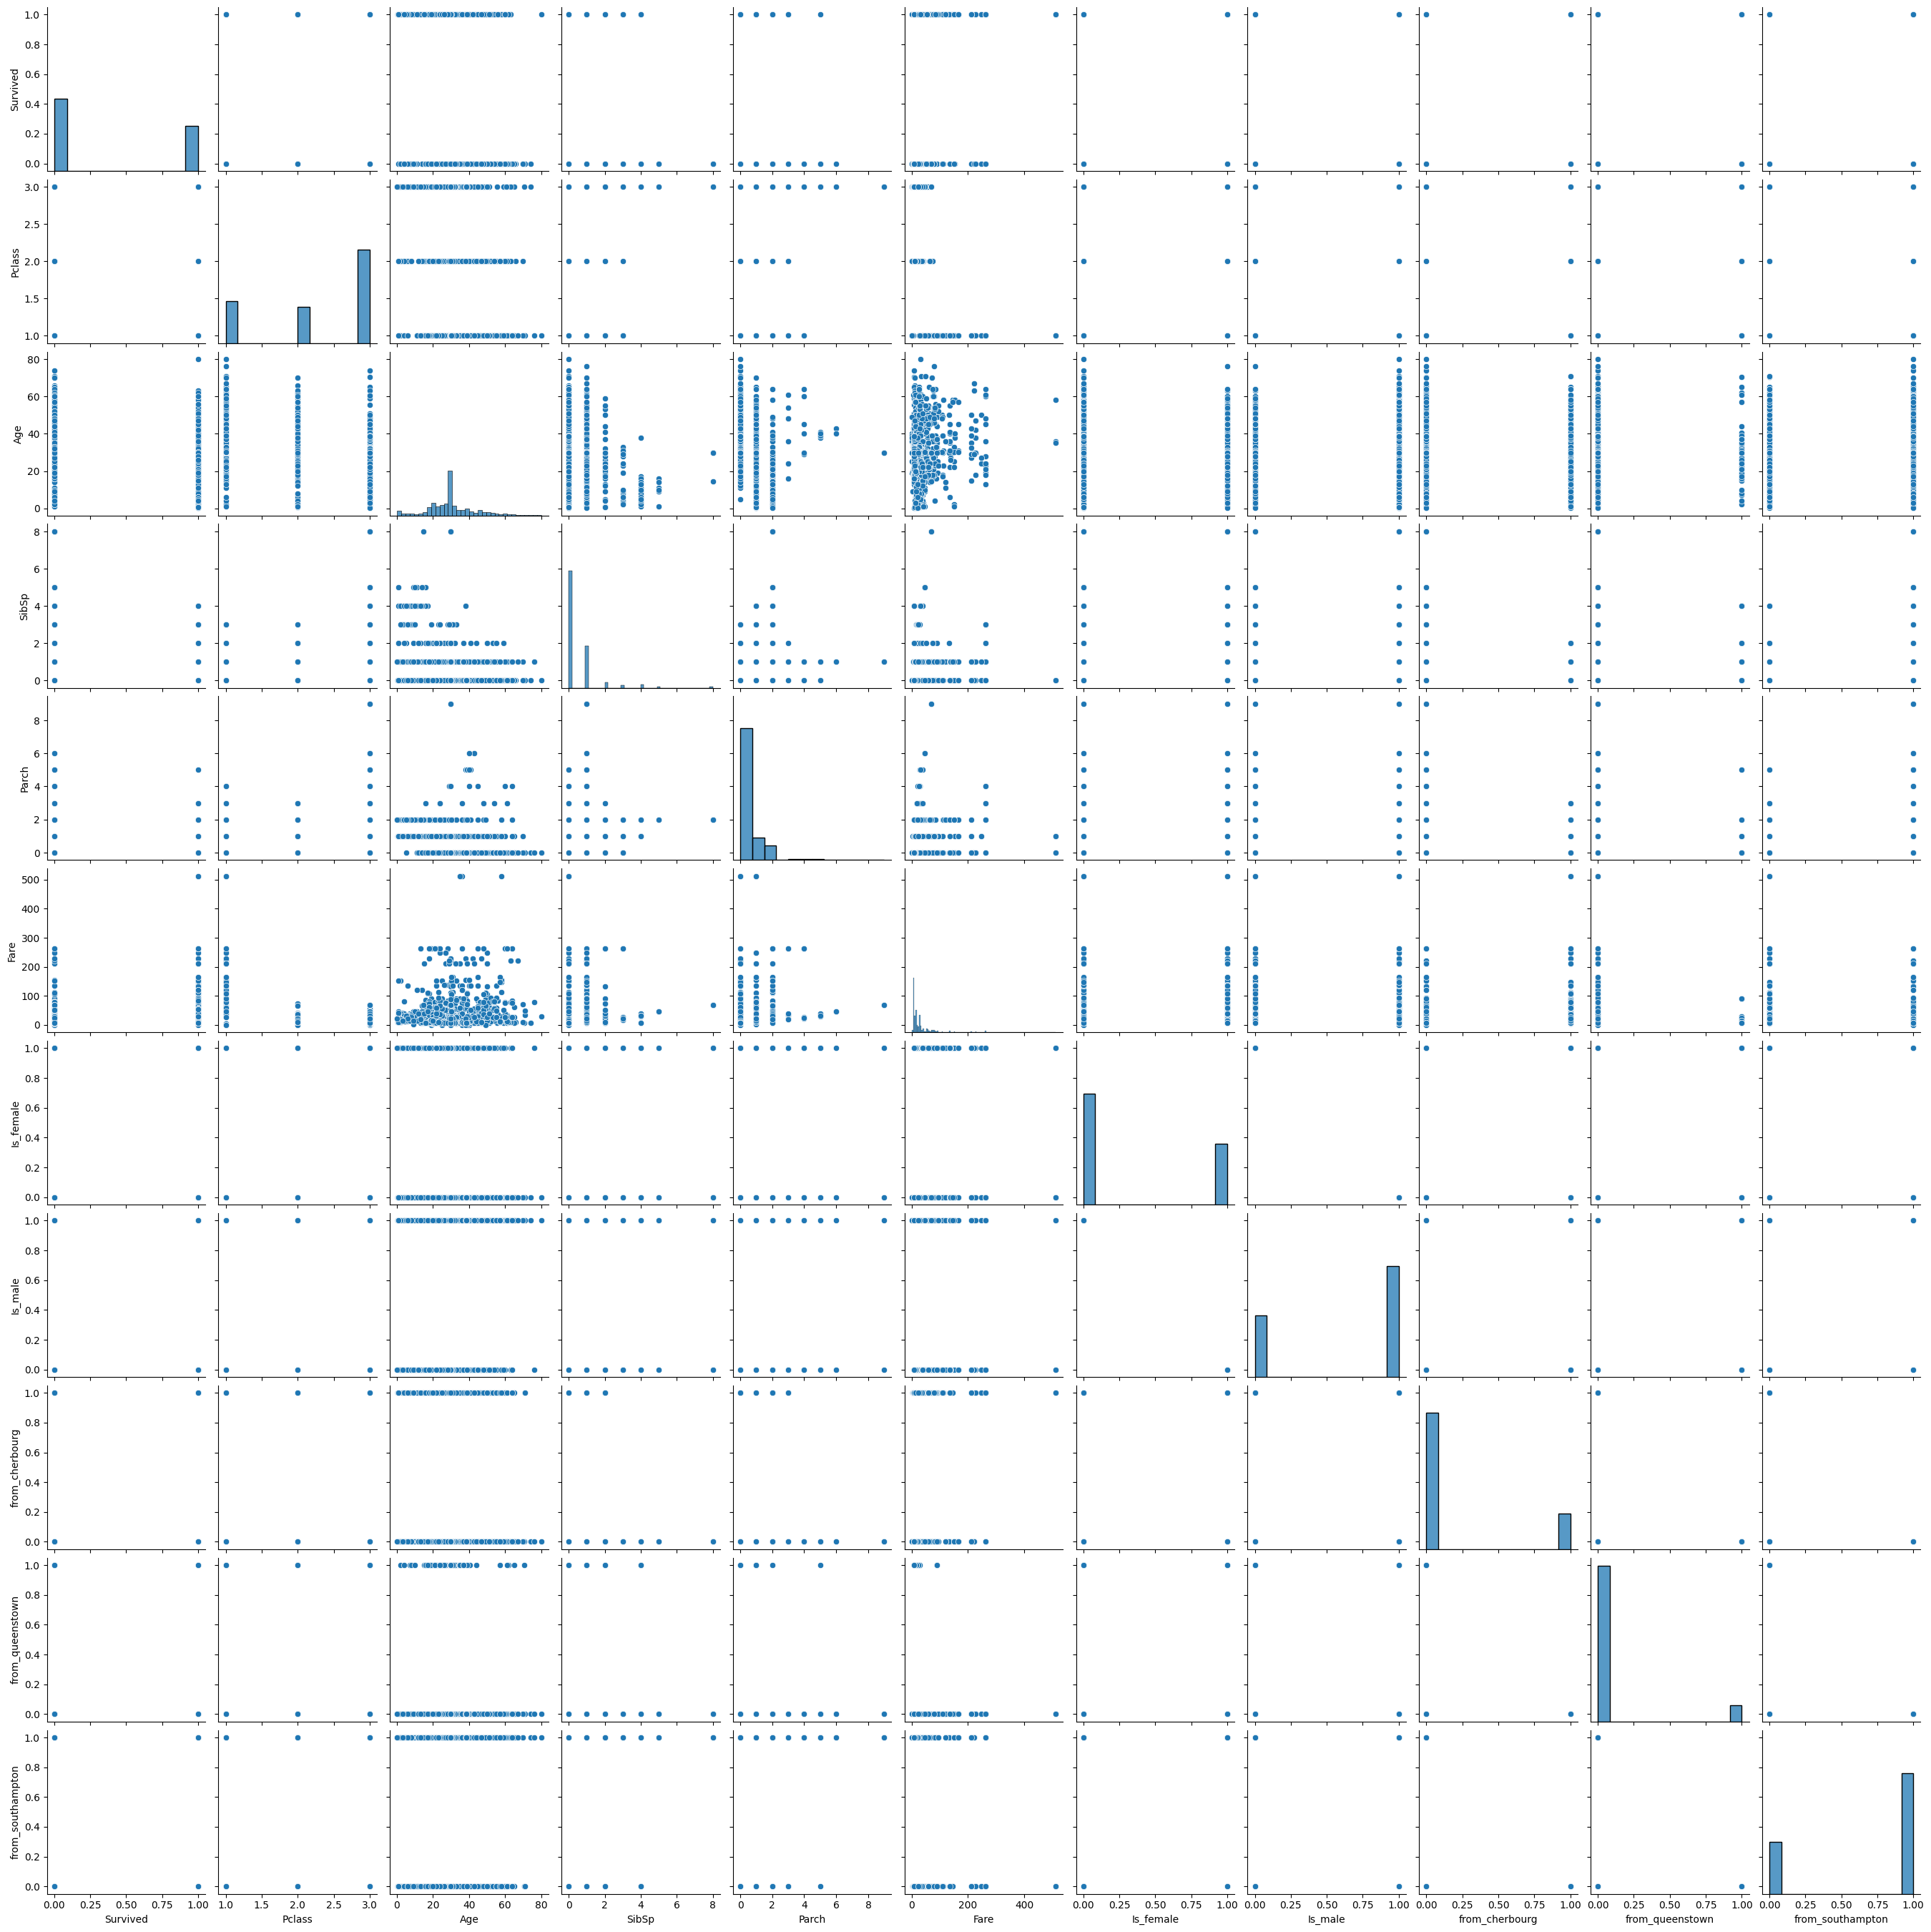

In [53]:
sns.pairplot(df_temp)

<Axes: >

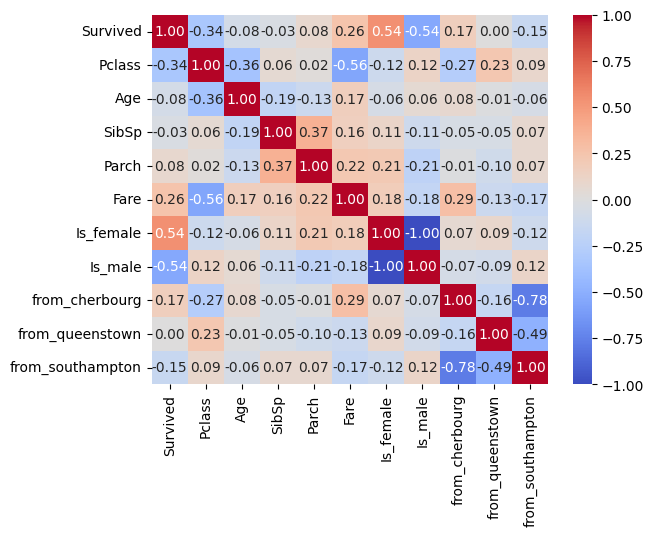

In [57]:
sns.heatmap(df_temp.corr(), annot=True, fmt=".2f", cmap="coolwarm")

### Q. Why is there high correlation between survived people and gender? Was the Titanic sexist?

<Axes: xlabel='Sex', ylabel='Count'>

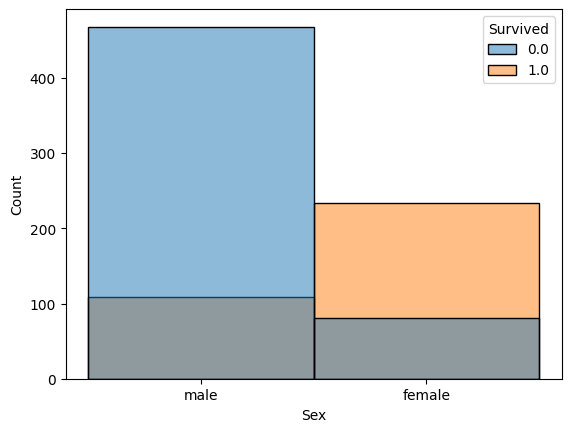

In [ ]:
sns.histplot(data=df, x="Sex", hue="Survived")

Mayybeee... Let's see the %age survival rate for each gender.

In [71]:
df.groupby("Sex")["Survived"].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

So, ~75% females survived and only 20% males survived?! The Titanic was a misandrist! not cool >:(

### Q. Pclass vs Fare - are these columns required? Should I drop one?

<Axes: xlabel='Pclass', ylabel='Fare'>

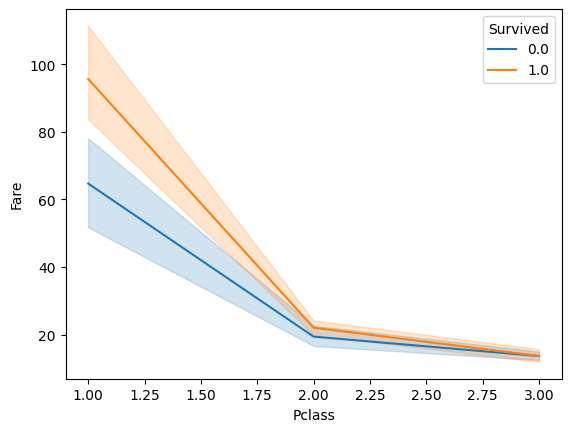

In [ ]:
sns.lineplot(data=df, x="Pclass", y="Fare", color="red", hue="Survived")

It appears that higher the Pclass value, lower the fair!!!

So, class 3 must be the poorest

More about survival:-

In [95]:
df.groupby("Pclass")["Survived"].mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [105]:
df.groupby("Survived")["Fare"].mean()

Survived
0.0    22.117887
1.0    48.395408
Name: Fare, dtype: float64

The Titanic favored the rich over the poor - CLASSISM!!!

## Using MODEL-BASED IMPUTATION to handle null in `Age`

In [34]:
# TODO
# impute_train = df[df["Age"].notna() & df["Survived"].notna()].drop("Survived", axis=1)
# impute_train